In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
df = pd.read_csv("testdata.csv", header=None)
df.head()

,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [46]:
df = pd.concat([pd.Series(1, index=df.index, name='00'), df], axis=1)
df.head()

,00,0,1,2
0,1,2104,3,399900
1,1,1600,3,329900
2,1,2400,3,369000
3,1,1416,2,232000
4,1,3000,4,539900


In [47]:
X = df.drop(columns=2)
y = df.iloc[:, 3]

In [48]:
for i in range(1, len(X.columns)):
    X[i-1] = X[i-1]/np.max(X[i-1])
X.head()

,00,0,1
0,1,0.469853,0.6
1,1,0.357302,0.6
2,1,0.535954,0.6
3,1,0.316213,0.4
4,1,0.669942,0.8


In [34]:
theta = np.array([0]*len(X.columns))
theta

array([0, 0, 0])

In [35]:
m = len(df)
m

47

In [36]:
def hypothesis(theta, X):
    return theta*X

In [37]:
def computeCost(X, y, theta):
    y1 = hypothesis(theta, X)
    y1=np.sum(y1, axis=1)
    return sum(np.sqrt((y1-y)**2))/(2*47)

In [38]:
def gradientDescent(X, y, theta, alpha, i):
    J = []  #cost function in each iterations
    k = 0
    while k < i:        
        y1 = hypothesis(theta, X)
        y1 = np.sum(y1, axis=1)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha*(sum((y1-y)*X.iloc[:,c])/len(X))
        j = computeCost(X, y, theta)
        J.append(j)
        k += 1
    return J, j, theta

In [40]:
J, j, theta = gradientDescent(X, y, theta, 0.05, 10000)
J, j, theta

([25769.318652894064,
  25769.28248268128,
  25769.31639504719,
  25769.28022483442,
  25769.31413720031,
  25769.27796698755,
  25769.311879353434,
  25769.27570914067,
  25769.309621506563,
  25769.27345129379,
  25769.237281081034,
  25769.27119344692,
  25769.23502323416,
  25769.268935600045,
  25769.23276538728,
  25769.266677753178,
  25769.230507540407,
  25769.21122841694,
  25769.24514078283,
  25769.208970570075,
  25769.17280035731,
  25769.206712723193,
  25769.17054251042,
  25769.204454876333,
  25769.168284663556,
  25769.20219702946,
  25769.166026816678,
  25769.199939182585,
  25769.163768969815,
  25769.127598757044,
  25769.161511122937,
  25769.125340910174,
  25769.159253276073,
  25769.123083063296,
  25769.15699542919,
  25769.120825216425,
  25769.10154609296,
  25769.135458458848,
  25769.09928824609,
  25769.0800091226,
  25769.113921488508,
  25769.077751275738,
  25769.041581062967,
  25769.075493428874,
  25769.0393232161,
  25769.07323558199,
  25769.037

In [41]:
y_hat = hypothesis(theta, X)
y_hat = np.sum(y_hat, axis=1)

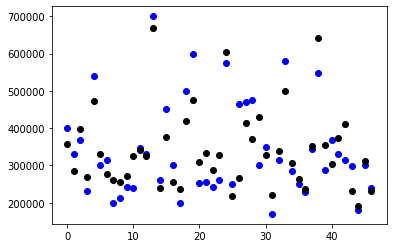

In [42]:
plt.figure()
plt.scatter(x=list(range(0, 47)),y= y, color='blue')         
plt.scatter(x=list(range(0, 47)), y=y_hat, color='black')
plt.show()

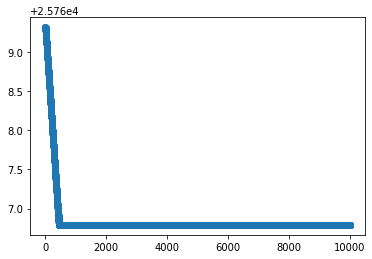

In [43]:
plt.figure()
plt.scatter(x=list(range(0, 10000)), y=J)
plt.show()